In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Import
numbers = pd.read_csv('C:/Users/Dell/Desktop/DaTa Science/IIITB/Python/SVM/assignmetn/train.csv')
numbers.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Some information aboout the data

print('The columns are : ', numbers.columns)
print('The dimension is : ', numbers.shape)

('The columns are : ', Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785))
('The dimension is : ', (42000, 785))


In [4]:
# checking the labels that we need to predict on test data
order = list(np.sort(numbers.label.unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [37]:
# checking for null values

numbers.isnull().sum().sort_values(ascending = True)

label       0
pixel516    0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
pixel521    0
pixel522    0
pixel523    0
pixel524    0
pixel515    0
pixel525    0
pixel527    0
pixel528    0
pixel529    0
pixel530    0
pixel531    0
pixel532    0
pixel533    0
pixel534    0
pixel535    0
pixel526    0
pixel514    0
pixel513    0
pixel512    0
pixel491    0
pixel492    0
pixel493    0
pixel494    0
pixel495    0
           ..
pixel288    0
pixel289    0
pixel290    0
pixel269    0
pixel390    0
pixel268    0
pixel266    0
pixel245    0
pixel246    0
pixel247    0
pixel248    0
pixel249    0
pixel250    0
pixel251    0
pixel252    0
pixel253    0
pixel254    0
pixel255    0
pixel256    0
pixel257    0
pixel258    0
pixel259    0
pixel260    0
pixel261    0
pixel262    0
pixel263    0
pixel264    0
pixel265    0
pixel267    0
pixel783    0
Length: 785, dtype: int64

In [6]:
numbers.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
# check for null

plt.figure(figsize=(20,20) )
sns.heatmap(numbers.corr() , annot = True , linewidth =0.5 , cmap = 'Greens')

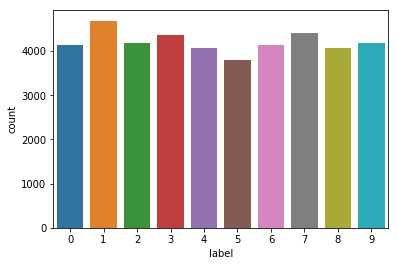

In [7]:
# checking the count of unique label in dataset
sns.countplot(numbers.label )

Text(0.5,1,'The Numher')

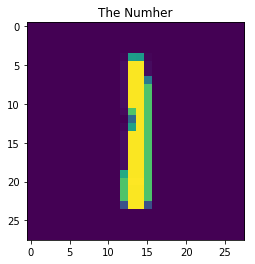

In [8]:
# plotting the labels

dis = numbers.iloc[2,1:]
dis = dis.values.reshape(28,28)
plt.imshow(dis)
plt.title('The Numher')

Text(0.5,1,'The Numher')

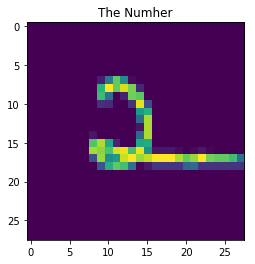

In [9]:
dis_1 = numbers.iloc[55,1:]
dis_1 = dis_1.values.reshape(28,28)
plt.imshow(dis_1)
plt.title('The Numher')

**DATA PREPARATION FOR MODELLING**

In [10]:
y = numbers.label
x = numbers.drop(columns = 'label')
print(y.shape , x.shape)

((42000L,), (42000, 784))


In [11]:
#Test Train split
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.3,
                                                    test_size = 0.7, random_state=100)

# Feature Scaling


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Dell\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# linear SVM model with hyperparameter optimization
linear_model = SVC(kernel = 'linear')
linear_model.fit(x_train , y_train)
y_pred = linear_model.predict(x_test)

In [13]:
print('accuracy : ' , metrics.accuracy_score(y_true = y_test , y_pred = y_pred))

('accuracy : ', 0.9201360544217687)


In [14]:
print(metrics.confusion_matrix(y_true = y_test , y_pred = y_pred))

[[2779    0    8    3    8   21   26    1    3    4]
 [   1 3223   16   13    2    4    1    9   26    7]
 [  24   15 2648   64   47   10   31   38   50    8]
 [  20   16   76 2767    2  105    7   13   58   16]
 [  10   11   15    8 2632    3   10    9    7  101]
 [  29   14   32  107   29 2364   47    8   49   17]
 [  35    6   52    3   24   39 2744    0    9    0]
 [   6   13   38   18   47    5    2 2806    5   86]
 [  27   48   37  109   22   78   26   14 2444   33]
 [  18   11    9   28  120   14    1   86   20 2645]]


In [15]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]


# specify model
model_1= SVC(kernel="linear")

# set up GridSearchCV()
model_cv_linear = GridSearchCV(estimator = model_1, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_linear.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 46.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

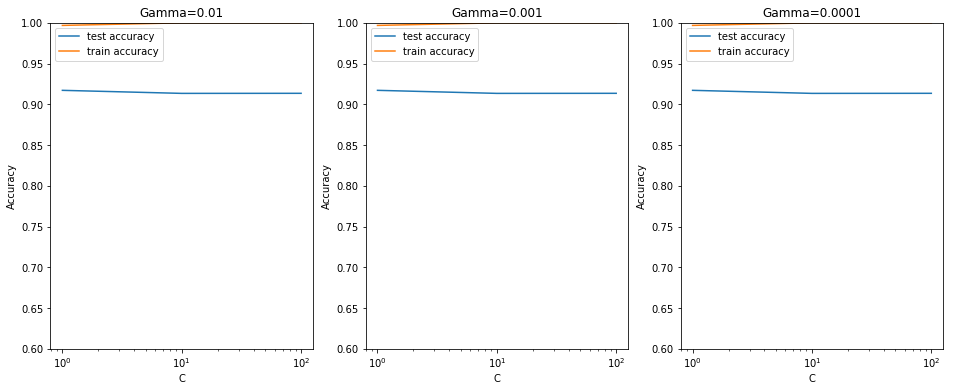

In [16]:
cv_results_linear = pd.DataFrame(model_cv_linear.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results_linear['param_C'] = cv_results_linear['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results_linear[cv_results_linear['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results_linear[cv_results_linear['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results_linear[cv_results_linear['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [17]:
linear_model_1 = SVC(C = 10 , gamma = 0.01, kernel = 'linear')
linear_model_1.fit(x_train , y_train)
y_pred_linear = linear_model_1.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred_linear))
print(metrics.confusion_matrix(y_test, y_pred_linear))

('accuracy', 0.9127551020408163)
[[2776    0    8    4    9   23   26    1    3    3]
 [   1 3223   16   14    2    3    1    9   26    7]
 [  24   17 2637   72   47   10   31   39   50    8]
 [  20   17   80 2744    2  118    7   10   65   17]
 [   8   11   15    8 2639    5   10   10    7   93]
 [  31   15   34  121   27 2327   47    9   67   18]
 [  35    6   58    1   25   41 2738    0    8    0]
 [   6   13   43   18   47    5    2 2773    6  113]
 [  29   55   44  130   19   92   27   19 2399   24]
 [  19    9    9   29  144   12    1  131   19 2579]]


**The linear model gives approx. 92% accuracy even after hyperparameter optimization. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters**

In [18]:
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(x_train , y_train)
y_pred_1 = rbf_model.predict(x_test)

In [19]:
print('accuracy : ' , metrics.accuracy_score(y_true = y_test , y_pred = y_pred_1))
print(metrics.confusion_matrix(y_true = y_test , y_pred = y_pred))

('accuracy : ', 0.9221428571428572)
[[2779    0    8    3    8   21   26    1    3    4]
 [   1 3223   16   13    2    4    1    9   26    7]
 [  24   15 2648   64   47   10   31   38   50    8]
 [  20   16   76 2767    2  105    7   13   58   16]
 [  10   11   15    8 2632    3   10    9    7  101]
 [  29   14   32  107   29 2364   47    8   49   17]
 [  35    6   52    3   24   39 2744    0    9    0]
 [   6   13   38   18   47    5    2 2806    5   86]
 [  27   48   37  109   22   78   26   14 2444   33]
 [  18   11    9   28  120   14    1   86   20 2645]]


**The non linear model too gives approx. 92.2 % accuracy with random hyperparameters. 
Let's look at a sufficiently non-linear model with optimized hyperparameters**

In [20]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 85.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [21]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,28.1058,9.9752,0.957381,0.979702,1,0.01,"{u'C': 1, u'gamma': 0.01}",4,0.963492,0.979167,...,0.958730,0.980159,0.951984,0.979663,0.950794,0.980456,1.237345,0.631963,0.005141,0.000542
1,45.8496,14.0404,0.912381,0.919167,1,0.001,"{u'C': 1, u'gamma': 0.001}",10,0.914683,0.918155,...,0.920238,0.916567,0.912302,0.919444,0.899206,0.922024,0.503471,0.070321,0.007074,0.001803
2,117.9584,22.1998,0.846905,0.849980,1,0.0001,"{u'C': 1, u'gamma': 0.0001}",12,0.837302,0.851786,...,0.857143,0.845337,0.848016,0.850000,0.834921,0.852579,3.176488,0.115678,0.009452,0.002515
3,23.6260,8.8284,0.968651,0.999623,10,0.01,"{u'C': 10, u'gamma': 0.01}",3,0.971825,0.999603,...,0.966667,0.999603,0.969048,0.999603,0.963889,0.999603,0.287635,0.179363,0.003064,0.000040
4,21.7762,8.7980,0.937619,0.959226,10,0.001,"{u'C': 10, u'gamma': 0.001}",7,0.942063,0.958036,...,0.944048,0.958036,0.930159,0.960417,0.925397,0.960516,0.262677,0.190006,0.008291,0.001089
5,45.3288,13.9810,0.910476,0.916310,10,0.0001,"{u'C': 10, u'gamma': 0.0001}",11,0.912302,0.915278,...,0.919048,0.913988,0.909127,0.916964,0.897222,0.919643,1.271023,0.279327,0.007375,0.001918
6,23.3792,8.9090,0.968730,1.000000,100,0.01,"{u'C': 100, u'gamma': 0.01}",1,0.971825,1.000000,...,0.966667,1.000000,0.969048,1.000000,0.963889,1.000000,0.283734,0.118445,0.003149,0.000000
7,17.5838,7.1436,0.944048,0.993889,100,0.001,"{u'C': 100, u'gamma': 0.001}",5,0.948016,0.993254,...,0.946429,0.994246,0.940873,0.994048,0.934127,0.994444,0.259781,0.146643,0.005923,0.000459
8,21.4704,8.6870,0.930000,0.951825,100,0.0001,"{u'C': 100, u'gamma': 0.0001}",8,0.931349,0.950694,...,0.938095,0.950893,0.925000,0.952778,0.916270,0.954067,0.222855,0.081963,0.008568,0.001368
9,23.5156,8.8654,0.968730,1.000000,1000,0.01,"{u'C': 1000, u'gamma': 0.01}",1,0.971825,1.000000,...,0.966667,1.000000,0.969048,1.000000,0.963889,1.000000,0.380660,0.061802,0.003149,0.000000


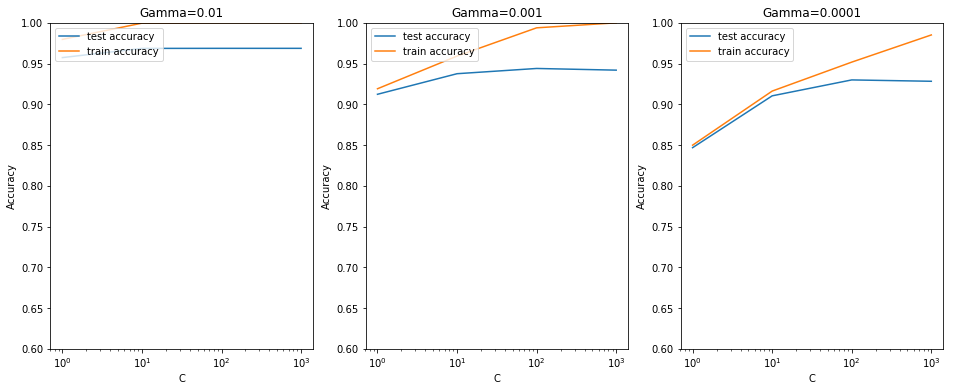

In [22]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

-- gamma 0.01 : the training accuracy increases to 100 % on C = 10.

-- On higher gammas i.e 0.001 and 0.0001, the training acuracy EVENTUALLY will increas to 100% but at a cost of higher C.

-- The distinction between gamma values can be made on test data accuracy, it is 97 % approximately for 0.01 gamma whereas at higher gammas the test data accuracy is less that 0.01 gamma's case.

In [23]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.96873015873 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [24]:
rbf_model_1 = SVC(C = 100 , gamma = 0.01, kernel = 'rbf')
rbf_model_1.fit(x_train , y_train)
y_pred_2 = rbf_model_1.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred_2))
print(metrics.confusion_matrix(y_test, y_pred_2))

('accuracy', 0.9668367346938775)
[[2823    0    2    0    6    8    8    2    4    0]
 [   0 3237   20    4    4   11    3   10    8    5]
 [  11    2 2830   20   12   11    4   20   19    6]
 [   4    4   27 2945    0   40    3    6   34   17]
 [   3    7    6    1 2716    3   10    4    3   53]
 [  11    4    3   35   11 2588   27    2    8    7]
 [  20    2    8    0    5   22 2848    0    7    0]
 [   4   12   15    2   17   11    2 2934    1   28]
 [   8   11   13   33   16   26   10    9 2694   18]
 [  13    5    4   18   48   11    0   32   11 2810]]


***The Model Accuracy with C = 10 and gamma = 0.01 is 97%. Using this model further***

In [25]:
# Just for confirmation

y_pred_train = rbf_model_1.predict(x_train)

# metrics
print("accuracy", metrics.accuracy_score(y_train, y_pred_train))
print(metrics.confusion_matrix(y_train, y_pred_train))

('accuracy', 1.0)
[[1279    0    0    0    0    0    0    0    0    0]
 [   0 1382    0    0    0    0    0    0    0    0]
 [   0    0 1242    0    0    0    0    0    0    0]
 [   0    0    0 1271    0    0    0    0    0    0]
 [   0    0    0    0 1266    0    0    0    0    0]
 [   0    0    0    0    0 1099    0    0    0    0]
 [   0    0    0    0    0    0 1225    0    0    0]
 [   0    0    0    0    0    0    0 1375    0    0]
 [   0    0    0    0    0    0    0    0 1225    0]
 [   0    0    0    0    0    0    0    0    0 1236]]


In [26]:
# testing on test data: to upload on kaggle

data_test = pd.read_csv('C:/Users/Dell/Desktop/DaTa Science/IIITB/Python/SVM/assignmetn/test.csv')
data_test.shape

(28000, 784)

In [27]:
data_test.columns

Index([u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4', u'pixel5',
       u'pixel6', u'pixel7', u'pixel8', u'pixel9',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=784)

In [28]:
data_test = scaler.transform(data_test)

In [29]:
label_predict = pd.DataFrame(rbf_model_1.predict(data_test))
label_predict.columns = ['Label']
label_predict = label_predict.rename_axis('ImageId')
label_predict.head()

,Label
ImageId,
0,2
1,0
2,9
3,4
4,3


In [30]:
order1 = list(np.sort(label_predict.Label.unique()))
print(order1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
label_predict.shape

(28000, 1)

In [32]:
# writing it to separate csv file
label_predict.to_csv('C:/Users/Dell/Desktop/DaTa Science/IIITB/Python/SVM/assignmetn/submission.csv')

***With linear model the accuracy was 92% even after optmizing the hyperparameters. Whereas for non linear models, the accuracy initially , at random C and Gamma, was 92%. But the non linear model accuracy improved to approx 97%***